# maysics.graph模块使用说明

graph模块包含三个类

|名称|作用|
|---|---|
|Floyd|弗洛伊德算法|
|Dijkstra|狄克斯特拉算法|
|Markov|马尔科夫链|

graph模块包含两个函数

|名称|作用|
|---|---|
|ek|EK算法|
|kruskal|克鲁斯卡尔算法|

<br></br>
## 本说明中使用的图G均为下图

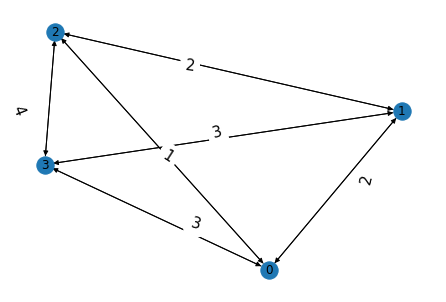

In [1]:
# 这里采用networkx包来对网络图进行绘制
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1, {'weight':2}), (0, 2, {'weight':1}), (0, 3, {'weight':3}),
                  (1, 0, {'weight':2}), (1, 2, {'weight':2}), (1, 3, {'weight':3}),
                  (2, 0, {'weight':1}), (2, 1, {'weight':2}), (2, 3, {'weight':4}),
                  (3, 0, {'weight':3}), (3, 1, {'weight':3}), (3, 2, {'weight':4})])
pos = nx.spring_layout(G, iterations=20)
nx.draw(G, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)
plt.show()

<br></br>
## 弗洛伊德算法：Floyd
求最短路径

<br>Floyd(G)
<br>```G```是图的邻接矩阵

### DEMO 1-1：求图G各个点到其他点之间的最短距离

In [2]:
from maysics.graph import Floyd

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

floyd = Floyd(G)
floyd.A

array([[0., 2., 1., 3.],
       [2., 0., 2., 3.],
       [1., 2., 0., 4.],
       [3., 3., 4., 0.]])

### DEMO 1-2：求图G第0点到第3点之间的最短距离

In [3]:
from maysics.graph import Floyd

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

floyd = Floyd(G)
floyd.path(0, 3)

(3.0, [0, 3])

### DEMO 1-3：求图G从第0点出发回到原点的最短有向环

In [4]:
from maysics.graph import Floyd

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

floyd = Floyd(G)
floyd.circle(0)

(2.0, [0, 2, 0])

<br></br>
## 狄克斯特拉算法：Dijkstra
求最短路径

<br>Dijkstra(G, ori)
<br>```G```是图的邻接矩阵
<br>```ori```是起点

### DEMO 2-1：求图G第0点到第3点之间的最短距离

In [5]:
from maysics.graph import Dijkstra

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

dijkstra = Dijkstra(G, 0)
dijkstra.path(3)

(3.0, [0, 3])

<br></br>
## 马尔科夫链：Markov
一阶马尔科夫连
<br>求解k步转移矩阵和稳态分布矩阵

<br>Markov(P)
<br>```P```是转移矩阵

### DEMO 3-1：求转移矩阵的3步转移矩阵

In [6]:
from maysics.graph import Markov

P = [[0.38, 0.37, 0.25],
     [0.2, 0.46, 0.34],
     [0.5, 0.25, 0.25]]

markov = Markov(P)
markov.k(3)

array([[0.346802, 0.369601, 0.283597],
       [0.34826 , 0.368386, 0.283354],
       [0.34745 , 0.369925, 0.282625]])

### DEMO 3-2：求转移矩阵的稳态分布矩阵

In [7]:
from maysics.graph import Markov

P = [[0.38, 0.37, 0.25],
     [0.2, 0.46, 0.34],
     [0.5, 0.25, 0.25]]

markov = Markov(P)
markov.w()

array([0.34752389, 0.36924414, 0.28323197])

<br></br>
## EK算法：ek
求解最大流问题

<br>ek(G, ori, des)
<br>```G```是邻接矩阵
<br>```ori```是起点
<br>```des```是终点

### DEMO 4-1：求解图G从第0点到第3点的最大流

In [8]:
from maysics.graph import ek

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

ek(G, 0, 3)

6.0

<br></br>
## 克鲁斯卡尔算法：kruskal
生成最小生成树

<br>kruskal(G)
<br>```G```是图的邻接矩阵

### DEMO 5-1：求解图G的最小生成树

In [9]:
from maysics.graph import kruskal

G = [[0, 2, 1, 3],
     [2, 0, 2, 3],
     [1, 2, 0, 4],
     [3, 3, 4, 0]]

kruskal(G)

[[1.0, 2, 0], [2.0, 1, 0], [3.0, 3, 0]]